# Cross Validation | Scoring

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df = pd.read_csv(url, delim_whitespace=True, names=names)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
array = df.values
array

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [8]:
X = array[:,0:13]
Y = array[:,13]
X, Y

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 1

In [9]:
seed = 7

In [10]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [11]:
model = LinearRegression()

In [12]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

In [13]:
for i in scoring:
    results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=i)
    print("[{0}] Mean = {1}, SD = {2}\n".format(i, results.mean(), results.std()))

[neg_mean_absolute_error] Mean = -4.004946635323983, SD = 2.083599268709537

[neg_mean_squared_error] Mean = -34.70525594452485, SD = 45.57399920030886

[r2] Mean = 0.20252899006056846, SD = 0.5952960169512226



## Calibration

In [14]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split

In [15]:
%matplotlib inline

In [16]:
# Create dataset of classification task with many redundant and few informative features
X, y = datasets.make_classification(n_samples=100000, n_features=20, 
                                    n_informative=2, n_redundant=10, random_state=43)

X, y

(array([[ 0.44948174, -0.90245234, -0.71782133, ...,  0.17884397,
         -1.12849927,  0.03529477],
        [ 1.32414579, -0.74454615, -0.33988259, ...,  1.48085739,
         -0.31519985, -0.65341945],
        [ 0.14128608,  1.64110976,  1.55911445, ...,  0.6369633 ,
          0.01414477, -0.75055737],
        ...,
        [-1.25934807,  1.09231539,  0.67950282, ..., -0.40922325,
          1.47815859,  0.4694112 ],
        [ 2.80943253,  2.00463801,  2.60244437, ..., -0.39713641,
          0.91214127, -2.80470972],
        [-0.32408174,  1.46256586,  1.27037868, ...,  0.34719438,
          1.21133666, -0.34671865]]), array([0, 1, 1, ..., 1, 1, 1]))

In [17]:
X.shape, y.shape

((100000, 20), (100000,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=43)

In [19]:
X_train, X_test, y_train, y_test

(array([[ 1.07652508,  0.03801372,  0.32020054, ...,  0.7404776 ,
          1.06729283, -0.78579728],
        [ 2.1945961 ,  1.39135795,  1.87103634, ...,  0.36254715,
          0.42269619, -2.12182774],
        [-0.96178256,  0.95223524,  0.62837824, ..., -1.51276161,
         -0.54017914,  0.31179547],
        ...,
        [-1.48563952, -0.75887231, -1.09690671, ..., -0.05851111,
          0.35647743,  1.36395916],
        [ 1.44222135,  0.27294521,  0.6348389 , ...,  0.98893724,
         -0.630141  , -1.14058766],
        [ 2.20966214,  0.97587279,  1.48976629, ...,  0.19205803,
          0.66116855, -1.96820341]]),
 array([[-1.08554344,  0.78527209,  0.44080285, ..., -0.60032452,
          1.36171015,  0.46647277],
        [-0.60937979,  1.56106684,  1.28619618, ...,  1.85367131,
          0.17643776, -0.18143275],
        [ 0.58659841,  1.63559123,  1.67186999, ..., -0.2031955 ,
          0.50081201, -1.06720195],
        ...,
        [-2.18202136,  4.49353013,  3.58904566, ..., -

In [20]:
def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')
    print("Isotonic: ", isotonic)

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')
    print("Sigmoid: ", sigmoid)

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1., solver='lbfgs')
    print("Logistic Regression Model: ", lr)

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name, histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

Isotonic:  CalibratedClassifierCV(base_estimator=GaussianNB(priors=None), cv=2,
            method='isotonic')
Sigmoid:  CalibratedClassifierCV(base_estimator=GaussianNB(priors=None), cv=2,
            method='sigmoid')
Logistic Regression Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)
Logistic:
	Brier: 0.074
	Precision: 0.916
	Recall: 0.876
	F1: 0.895

Naive Bayes:
	Brier: 0.110
	Precision: 0.849
	Recall: 0.911
	F1: 0.879

Naive Bayes + Isotonic:
	Brier: 0.081
	Precision: 0.922
	Recall: 0.863
	F1: 0.892

Naive Bayes + Sigmoid:
	Brier: 0.100
	Precision: 0.856
	Recall: 0.906
	F1: 0.880



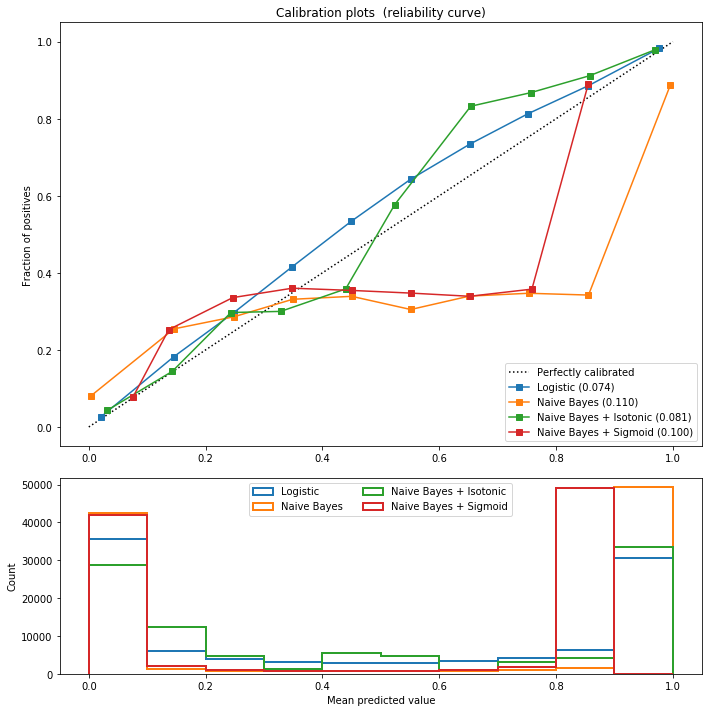

In [21]:
# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(GaussianNB(), "Naive Bayes", 1)

Isotonic:  CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
            cv=2, method='isotonic')
Sigmoid:  CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
            cv=2, method='sigmoid')
Logistic Regression Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)
Logistic:
	Brier: 0.074
	Precision: 0.916
	Recall: 0.876
	F1: 0.895

SVC:
	Brier: 0.166
	Precision: 0.916
	Re

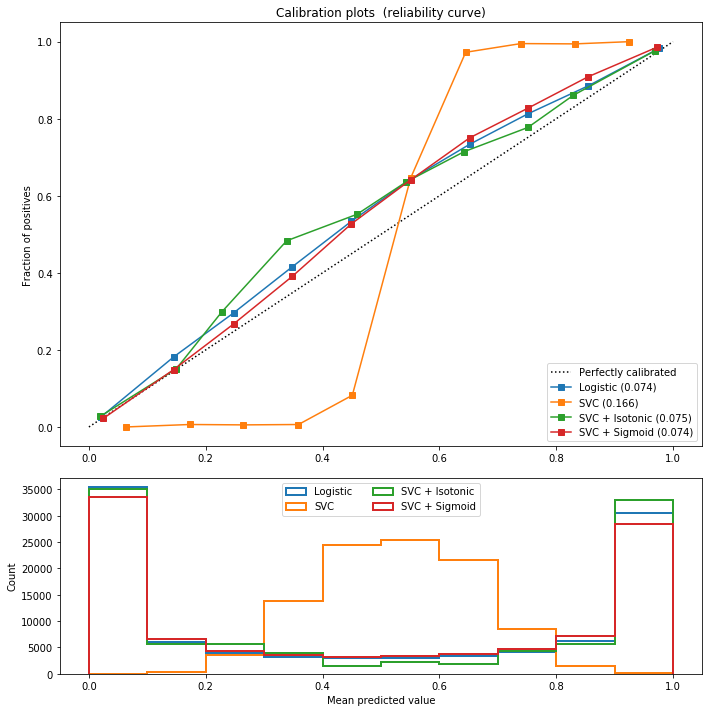

In [22]:
# Plot calibration curve for Linear SVC
plot_calibration_curve(LinearSVC(), "SVC", 2)